<a href="https://colab.research.google.com/github/victormazevedo/predict-financial-fraud/blob/master/Predict_Financial_Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict Financial Fraud with Data Science Analysis

![alt text](http://www.fatecrp.edu.br/wp-content/themes/fatecrp/dist/img/logo.png)

This is a final-project destinated to Analise e Densenvolvimento de Sistema's course of Fatec Ribeirão Preto

O seguinte projeto é destinado ao trabalho de conclusão de curso do curso de Análise e Desenvolvimento de Sistemas da Fatec Ribeirão Preto. O tema deste projeto é Detecção Automática de Fraude Financeira utilizando Data Science.

Para isto, utilizarei um [dataset](https://www.kaggle.com/ntnu-testimon/paysim1) presente no site [Kaggle](https://kaggle.com).
Este dataset simula transações realizadas via mobile com base em uma amostra de um mês inteiro, disponibilizado por um grande serviço de banco digital da África. Este mesmo serviço também existe em 14 países.
O dataset disponibilizado no Kaggle representa 1/4 do dataset original.

# Breve descrição do Dataset

* step - mapeia a unidade de tempo no mundo real.

* type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

* amount - total da transação na moeda local.

* nameOrig - cliente que começou a transação.

* oldbalanceOrg - saldo inicial antes da transação.

* newbalanceOrig - saldo final depois da transação.

* nameDest - cliente que recebeu a transação (destinatário/favorecido).

* oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

* newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

* isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

* isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

## Import do dataset



In [1]:
#importando algumas libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
from random import seed,sample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, roc_curve, auc,\
precision_score
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
import seaborn as sns
import time

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#importando dados do DropBox
pd.set_option('display.max_columns', 20)
!wget 'https://www.dropbox.com/s/2f2ex1g5gvug9rg/PS_20174392719_1491204439457_log.csv?dl=0'
df = pd.read_csv('PS_20174392719_1491204439457_log.csv?dl=0')

--2020-05-24 22:51:17--  https://www.dropbox.com/s/2f2ex1g5gvug9rg/PS_20174392719_1491204439457_log.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.1, 2620:100:6032:1::a27d:5201
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/2f2ex1g5gvug9rg/PS_20174392719_1491204439457_log.csv [following]
--2020-05-24 22:51:17--  https://www.dropbox.com/s/raw/2f2ex1g5gvug9rg/PS_20174392719_1491204439457_log.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc01b35f614610c2d92d909ec539.dl.dropboxusercontent.com/cd/0/inline/A4W9ajdCt_jBQlZxhyqyCghY0Do18h6RGneqyP5t5TE0JFrfz2I3dGbc0CNihcIaDNozh40_wAhjTQdsk1EOwo_FDmXQPNvy5wP_6HcZU8TiNATm6TheQFJDzt7h5Oxi99E/file# [following]
--2020-05-24 22:51:17--  https://uc01b35f614610c2d92d909ec539.dl.dropboxusercontent.com/cd/0/inline/A4W9ajdCt_jBQlZxhyqyCghY0Do18h6RGn

# Resumo dos dados

In [3]:
  df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [4]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [5]:
df.shape

(6362620, 11)

### Explicando cada coluna e seus dados

Ao executar o _info_, conseguimos visualizar

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB
None


In [7]:
# renomeando oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest
df = df.rename(columns={'oldbalanceOrg':'oldBalanceOrig', 'newbalanceOrig':'newBalanceOrig', 'oldbalanceDest':'oldBalanceDest', 'newbalanceDest':'newBalanceDest'})
df.head(1)

,step,type,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0


In [8]:
# verificando se existem valores nulos no dataset
df.isna().values.any()
df.isna().sum(0).sort_values(ascending = False)

isFlaggedFraud    0
isFraud           0
newBalanceDest    0
oldBalanceDest    0
nameDest          0
newBalanceOrig    0
oldBalanceOrig    0
nameOrig          0
amount            0
type              0
step              0
dtype: int64

### Categorizando os tipos de contas
- Aqui farei uma categorização de quem para quem foi a trasação. Por exemplo:
CC (Customer to Customer), CM (Customer to Merchant), MC (Merchant to Customer), MM (Merchant to Merchant)

In [0]:
# realiza uma cópia do dataframe
newDf = df.copy()
newDf["accountTransactionType"] = np.nan
newDf.loc[df.nameOrig.str.contains('C') & df.nameDest.str.contains('C'), "accountTransactionType"] = "CC"
newDf.loc[df.nameOrig.str.contains('C') & df.nameDest.str.contains('M'), "accountTransactionType"] = "CM"
newDf.loc[df.nameOrig.str.contains('M') & df.nameDest.str.contains('C'), "accountTransactionType"] = "MC"
newDf.loc[df.nameOrig.str.contains('M') & df.nameDest.str.contains('M'), "accountTransactionType"] = "MM"

In [0]:
fraud = newDf[newDf["isFraud"] == 1]
genuine = newDf[newDf["isFraud"] == 0]

In [11]:
# número de transações fraudulentas e genuínas por accountTransactionType
print(f"Número de transações fraudulentas: \n {fraud.accountTransactionType.value_counts()}")
print(f"Número de transações genuínas: \n {genuine.accountTransactionType.value_counts()}")

Número de transações fraudulentas: 
 CC    8213
Name: accountTransactionType, dtype: int64
Número de transações genuínas: 
 CC    4202912
CM    2151495
Name: accountTransactionType, dtype: int64


Com a análise acima, percebe-se um certo padrão de que as transações fraudulentas são feitas apenas em transações 'Customer to Customer'.
Já que não precisaremos mais desta colunas, as eliminarei

In [0]:
fraud = fraud.drop("accountTransactionType", 1)
genuine = genuine.drop("accountTransactionType", 1)
newDf = newDf.drop("accountTransactionType", 1)

### Tipos de transações

In [13]:
print(f"Tipos de transações fraudulentas: \n{fraud.type.value_counts()}")
print(f"Tipos de transações genuínas: \n{genuine.type.value_counts()}")

Tipos de transações fraudulentas: 
CASH_OUT    4116
TRANSFER    4097
Name: type, dtype: int64
Tipos de transações genuínas: 
CASH_OUT    2233384
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     528812
DEBIT         41432
Name: type, dtype: int64


Com a análise acima, percebemos que, incluíndo que as transaçoes fraudulentas são de Customer pra Customer, os tipos de transações presentes entre elas é de CASH_OUT e TRANSFER.

Das 8213 transações fraudulentas CC, 4116 são CASH_OUT e 4097 TRANSFER.

In [0]:
# alterando os dataframes para conter apenas transações do tipo CASH_OUT e TRANSFER
genuine = genuine[(genuine["type"] == "CASH_OUT") | (genuine["type"] == "TRANSFER")]
newDf = newDf[(newDf["type"] == "CASH_OUT") | (newDf["type"] == "TRANSFER")]

### Saldo antes e depois da transação

In [15]:
wrongOrigBalance = sum(df.oldBalanceOrig - df.amount != df.newBalanceOrig)
wrongDestBalance = sum(df.newBalanceDest + df.amount != df.newBalanceDest)
print(f"Porcentagem de saldos errados para pessoas que fizeram a transação: {100*round(wrongOrigBalance/len(df),2)}")
print(f"Porcentagem de saldos errados para pessoas que receberam a transação: {100*round(wrongDestBalance/len(df),2)}")

Porcentagem de saldos errados para pessoas que fizeram a transação: 85.0
Porcentagem de saldos errados para pessoas que receberam a transação: 100.0


Com o trecho acima, claramente vemos que não conseguimos estimar muito bem o que acontece tanto nas contas que trasnferem quanto nas contas que recebem dinheiro.

In [16]:
numberOfWrongBalance = (df["oldBalanceOrig"] - df["amount"] != df["newBalanceOrig"]) | (df["newBalanceDest"] + df["amount"] != df["newBalanceDest"])
print(f"Percentual de transações com o saldo errado: {100*round(sum(numberOfWrongBalance)/len(df),2)}")

Percentual de transações com o saldo errado: 100.0


Com a análise feita acima, percebemos que todos os dados deste dataset apresentam um erro no saldo. Não sei o porque. Para manter a integridade, criarei duas novas colunas no dataset: _errorBalanceOrig_ e _errorBalanceDest_.

In [0]:
newDf["errorBalanceOrig"] = newDf.newBalanceOrig + newDf.amount - newDf.oldBalanceOrig
newDf["errorBalanceDest"] = newDf.oldBalanceDest + newDf.amount - newDf.newBalanceDest

#inserindo dados no fraud e genuine
fraud = newDf[newDf["isFraud"] == 1]
genuine = newDf[newDf["isFraud"] == 0]

In [18]:
fraud.head()

,step,type,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud,errorBalanceOrig,errorBalanceDest
2,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,0,0.0,181.0
3,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,0,0.0,21363.0
251,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1,0,0.0,2806.0
252,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1,0,0.0,29008.0
680,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1,0,0.0,20128.0


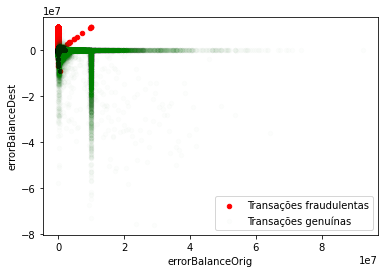

In [19]:
ax = plt.subplot()
fplot = fraud.plot(x="errorBalanceOrig",y="errorBalanceDest",color="red",kind="scatter",ax=ax,label="Transações fraudulentas")
gplot = genuine.plot(x="errorBalanceOrig",y="errorBalanceDest",color="green",kind="scatter",alpha=0.01,ax=ax,label= "Transações genuínas")

Com o gráfico de dispersão acima, percebemos que grande parte das transações fraudulentas ocorrem com o erroBalanceDest > 0, enquanto as transações genuinas possuem um errorBalanceDest <= 0.

In [20]:
print(f"Proporção de transações fraudulentas com errorBalanceDest > 0: {len(fraud[fraud.errorBalanceDest > 0])/len(fraud)}")
print(f"Proporção de transações fraudulentas com errorBalanceOrig > 0: {len(fraud[fraud.errorBalanceOrig > 0])/len(fraud)}")
print(f"Proporção de transações genuínas com errorBalanceDest > 0: {len(genuine[genuine.errorBalanceDest > 0])/len(genuine)}")
print(f"Proporção de transações genuínas com errorBalanceOrig > 0: {len(genuine[genuine.errorBalanceOrig >0])/len(genuine)}")

Proporção de transações fraudulentas com errorBalanceDest > 0: 0.5712894192134421
Proporção de transações fraudulentas com errorBalanceOrig > 0: 0.006331425788384269
Proporção de transações genuínas com errorBalanceDest > 0: 0.19744942067832985
Proporção de transações genuínas com errorBalanceOrig > 0: 0.9067180605576143


Conclui-se que os dados que obtemos do dataset estão bem desbalanceados. Transações genuína tem mais chances de ter errorBalanceOrig > 0. 
Enquanto as transações fraudulentas tem mais chances de ter errorBalanceDest > 0.
Estes números podem ser importantes features para o nosso modelo.

## Conferindo utilidade de nameDest e nameOrig

Segundo o que a descrição do datase diz, a fraude ocorre com o seguinte comportamento:

_This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system._

Testaremos se realmente ocorre isso

In [21]:
# como já sabemos, as transações fraudulentas são divididas entre CASH_OUT e TRANSFER. 
newDf.head(15)

,step,type,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud,errorBalanceOrig,errorBalanceDest
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,0.000000e+00,181.00
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,0.000000e+00,21363.00
15,1,CASH_OUT,229133.94,C905080434,15325.00,0.00,C476402209,5083.00,51513.44,0,0,2.138089e+05,182703.50
19,1,TRANSFER,215310.30,C1670993182,705.00,0.00,C1100439041,22425.00,0.00,0,0,2.146053e+05,237735.30
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.00,C932583850,6267.00,2719172.89,0,0,3.008509e+05,-2401220.00
42,1,CASH_OUT,110414.71,C768216420,26845.41,0.00,C1509514333,288800.00,2415.16,0,0,8.356930e+04,396799.55
47,1,CASH_OUT,56953.90,C1570470538,1942.02,0.00,C824009085,70253.00,64106.18,0,0,5.501188e+04,63100.72
48,1,CASH_OUT,5346.89,C512549200,0.00,0.00,C248609774,652637.00,6453430.91,0,0,5.346890e+03,-5795447.02
51,1,CASH_OUT,23261.30,C2072313080,20411.53,0.00,C2001112025,25742.00,0.00,0,0,2.849770e+03,49003.30
58,1,TRANSFER,62610.80,C1976401987,79114.00,16503.20,C1937962514,517.00,8383.29,0,0,0.000000e+00,54744.51


In [22]:
fraudCashOut = fraud[fraud["type"] == "CASH_OUT"]
fraudTransfer = fraud[fraud["type"] == "TRANSFER"]

fraudTransfer.nameDest.isin(fraudCashOut.nameOrig).any()

False

Em transações fraudulentas, a conta que aparece no (nameOrig e nameDest) que recebeu a transferência não é a mesma utilizada para o saque.

Sendo assim, nameOrig e nameDest não possuem muita utilidade no nosso modelo

In [0]:
names = ["nameOrig", "nameDest"]
newDf = newDf.drop(names, 1)
fraud = fraud.drop(names, 1)
genuine = genuine.drop(names, 1)

## O que determina uma transação ser marcada como _isFlaggedFraud_?

Segundo a descrição do dataset fornecido pelo Kaggle, uma transação é marcada como fraude quando uma transferência envolver um valor maior que 200.000.

In [24]:
countIsFlaggedFraud = df.loc[(df.isFlaggedFraud == 1)]
print("O número de transações marcadas como isFlaggedFraud é: {} ".format(len(countIsFlaggedFraud)))

print("O tipo de transações que estão flagadas com isFlaggedFraud é: {}".format(list(df.loc[df.isFlaggedFraud == 1].type.drop_duplicates())))

dfTransfer = df.loc[df.type == 'TRANSFER']
dfFlagged = df.loc[df.isFlaggedFraud == 1]
dfNotFlagged = df.loc[df.isFlaggedFraud == 0]

print('\nValor minimo transacionado quando a flag esta ativa: ${}'.format(dfFlagged.amount.min()))
print('\nValor maximo quando a flag estava inativa: ${}'.format(dfNotFlagged.amount.max()))

O número de transações marcadas como isFlaggedFraud é: 16 
O tipo de transações que estão flagadas com isFlaggedFraud é: ['TRANSFER']

Valor minimo transacionado quando a flag esta ativa: $353874.22

Valor maximo quando a flag estava inativa: $92445516.64


In [25]:
# agora vamos ver quantas transações deveriam ser marcadas como fraude seguindo o critério passado
shouldBeFlagged = fraud[(fraud["amount"] > 200000) & (fraud["type"] == "TRANSFER")]
print(f"Número de transações que deveriam ser flaggadas: {len(shouldBeFlagged)}")

Número de transações que deveriam ser flaggadas: 2740


Em um dataset com mais de 2 milhoões de registros, ter apenas 16 marcados como isFlaggedFraud não faz muito sentido.

Outro ponto é que há subnotificações. Há 2740 transações que deveriam ter sido marcadas, porém não foram.

Por este motivo, droparei esta coluna.

In [0]:
fraud = fraud.drop("isFlaggedFraud", 1)
genuine = genuine.drop("isFlaggedFraud", 1)
newDf = newDf.drop("isFlaggedFraud", 1)

# Horário das transações

No dataset fornecido, temos uma unidade de medida de tempo que está no campo _step_.

Neste tópico, iremos explorar uma pouco mais o step. Se fizermos uma max no step, veremos que trará um resultado de 743. Um mês completo tem aproximadamente 730 horas, ou seja, neste dataset foram registrados 1 mês e alguns dias de transações.

In [27]:
max(newDf.step)

743

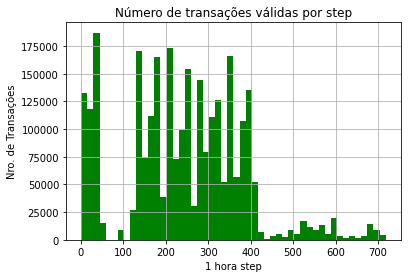

In [28]:
genuine.hist(column="step", color="green", bins=50)
plt.xlabel("1 hora step")
plt.ylabel("Nro. de Transações")
plt.title("Número de transações válidas por step")

plt.show()

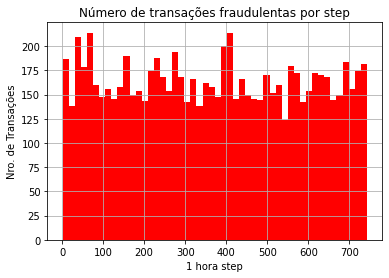

In [29]:
fraud.hist(column="step", color="red", bins=50)
plt.xlabel("1 hora step")
plt.ylabel("Nro. de Transações")
plt.title("Número de transações fraudulentas por step")

plt.show()

Os gráficos acima nos mostram um certo comportamento:

entre os steps (0,60) percebemos um certo pico, tanto de transações fraudulentas quanto de transações genuínas. Outro ponto pare se perceber é que em alguns steps não há nenhuma transação genuína, enquanto em todos os steps há algum registro de transação faudulenta.

Observado o histograma de fraude, também vemos que o menor número de transações fraudulentas é de 125. Enquanto em transações genuínas houveram alguns casos em que não ocorreu nenhuma transação.

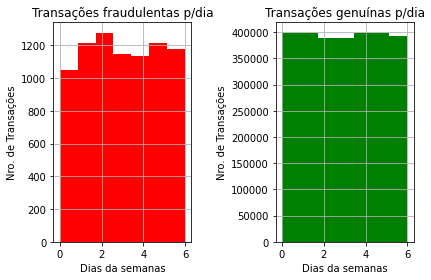

In [30]:
# horas da semana
numDays = 7
numHours = 24
fraudDays = fraud.step % numDays
fraudHours = fraud.step % numHours
genuineDays = genuine.step % numDays
genuineHours = genuine.step % numHours

plt.subplot(1,2,1)
fraudDays.hist(bins=numDays,color="red")
plt.xlabel("Dias da semanas")
plt.ylabel("Nro. de Transações")
plt.title("Transações fraudulentas p/dia")

plt.subplot(1,2,2)
genuineDays.hist(bins=numDays,color="green")
plt.xlabel("Dias da semanas")
plt.ylabel("Nro. de Transações")
plt.title("Transações genuínas p/dia")

plt.tight_layout()



Pelos gráficos acima, percebemos que as transações tanto fraudulentas quanto genuínas ocorrem de maneira uniforme.

Para as transações fraudulentas, percebe-se que são mais frequentes durante a semana.

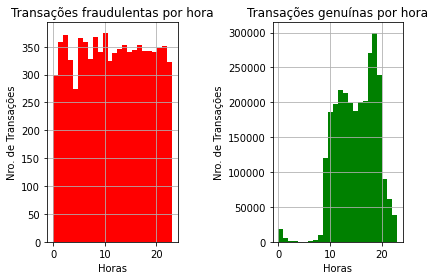

In [31]:
plt.subplot(1,2,1)
fraudHours.hist(bins=numHours, color="red")
plt.xlabel("Horas")
plt.ylabel("Nro. de Transações")
plt.title("Transações fraudulentas por hora")

plt.subplot(1,2,2)
genuineHours.hist(bins=numHours, color="green")
plt.xlabel("Horas")
plt.ylabel("Nro. de Transações")
plt.title("Transações genuínas por hora")

plt.tight_layout()

Pelo gráfico acima percebemos que, entre 0 a 9 horas aproximadamente, enquanto as transações genuínas estão em baixa, as fraudulentas mantém o mesmo ritmo quase que do resto do dia.

Desta maneira, o horário seria um grande indicador e uma boa feature para o nosso modelo.

In [32]:
dataset = newDf.copy()
dataset["HourOfDay"] = np.nan
dataset.HourOfDay = newDf.step % numHours

dataset.head(5)

,step,type,amount,oldBalanceOrig,newBalanceOrig,oldBalanceDest,newBalanceDest,isFraud,errorBalanceOrig,errorBalanceDest,HourOfDay
2,1,TRANSFER,181.00,181.0,0.0,0.0,0.00,1,0.00,181.0,1
3,1,CASH_OUT,181.00,181.0,0.0,21182.0,0.00,1,0.00,21363.0,1
15,1,CASH_OUT,229133.94,15325.0,0.0,5083.0,51513.44,0,213808.94,182703.5,1
19,1,TRANSFER,215310.30,705.0,0.0,22425.0,0.00,0,214605.30,237735.3,1
24,1,TRANSFER,311685.89,10835.0,0.0,6267.0,2719172.89,0,300850.89,-2401220.0,1


# Valores transacionados em TRANSFERs

In [33]:
print(f"Infos estatísticas do valor de transações fraudulentas:\n {fraud.amount.describe()} \n\n")
print(f"Infos estatísticas do valor de transações genuínas:\n {genuine.amount.describe()}")

Infos estatísticas do valor de transações fraudulentas:
 count    8.213000e+03
mean     1.467967e+06
std      2.404253e+06
min      0.000000e+00
25%      1.270913e+05
50%      4.414234e+05
75%      1.517771e+06
max      1.000000e+07
Name: amount, dtype: float64 


Infos estatísticas do valor de transações genuínas:
 count    2.762196e+06
mean     3.141155e+05
std      8.771441e+05
min      1.000000e-02
25%      8.290823e+04
50%      1.710345e+05
75%      3.059942e+05
max      9.244552e+07
Name: amount, dtype: float64


Realizando o _describe_ acima, percebemos o seguinte:

* Para transações fraudulentas, vemos que o maior valor transacionado foi no valor de 10 milhões, enquanto o maior valor de transações genuínas foi de 92.4 milhões.

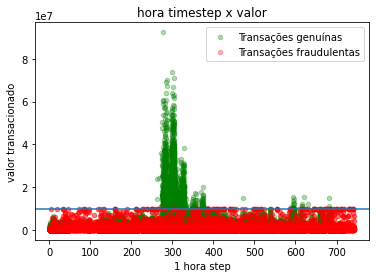

In [34]:
alpha = 0.3
fix, ax = plt.subplots()
genuine.plot.scatter(x="step", y="amount",color="green", alpha=alpha, ax=ax, label="Transações genuínas")
fraud.plot.scatter(x="step", y="amount", color="red", alpha=alpha, ax=ax, label="Transações fraudulentas")

plt.title("hora timestep x valor")
plt.ylabel("valor transacionado")
plt.xlabel("1 hora step")

plt.axhline(y=10000000)
plt.show()

In [35]:
print(f"Proporção de transações em que o valor transacionado foi maior que 10.000.000: {len(newDf[newDf.amount > 10000000])/len(newDf)}")

Proporção de transações em que o valor transacionado foi maior que 10.000.000: 0.0008818192548464865


Como já dito anteriormente, somente em transações genuínas que temos transações com valores superiores a 10.000.000, porém, com o cálculo acima nota-se que estas transações correspondem a menos de 0,01% dos dados.

# Etapa de Pré-Processamento

Esta é a etapa em que preparamos o _dataframe_ para o modelo que usaremos.

Um dos primeiros problemas que enfrentamos ao utilizar *machine learning*, é de que em determindados *datasets* temos dados categóricos. Mas o que são dados categórios?

Dados categóricos, de maneira resumida, são valores *rotuláveis*, ou seja valores calssificatórios ao invés de valores numéricos. Isto é, aqueles que identificam para cada caso uma categoria.

Por exemplo: a variável 'veículo' pode ser classificada como: 'carro', 'motocicleta', 'bicicleta' etc.

Ok, mas qual é o problema com dados categóricos?

O grande problema de dados categóricos, é que a grande maioria dos algoritmos de *machine learning* não conseguem trabalhar diretamente com este tipo de dado. Para que consiga trabalhar, o algoritmo precisa que todos os valores de entrada e saída sejam numéricos, ou seja, os dados categóricos precisam ser convertidos.

## Como realizar a conversão de dados categóricos em dados númericos?

Essa conversão pode ser feita utilizando as seguintes técnicas:


*   Integer Encoding
*   One-hot Encoding

### Integer Encoding

Em um primeiro passo, cada categoria única é atribuída a um valor inteiro.
Por exemplo: "vermelho" recebe 1, "verde" recebe 2 e "azul" recebe 3. Como os números inteiros possuem uma relação ordenada entre si, os algoritmos de *machine learning* conseguem entender e aproveitar estes dados.

### One-hot Encoding

Diferentemente do que foi apresentado acima, o *one-hot encoding* transforma os dados categóricos e um vetor binário. Ou seja, "vermelho" ficaria [1, 0, 0], "verde" [0, 1, 0] e "azul" [0, 0, 1]. A quantidade de variáveis binárias acontece de acordo com o número de categorias a serem convertidas.

No nosso caso, usaremos _one-hot_encoding_ na coluna type.

In [0]:
dataset = pd.get_dummies(dataset, prefix=["type"])

In [37]:
dataset.head()

,step,amount,oldBalanceOrig,newBalanceOrig,oldBalanceDest,newBalanceDest,isFraud,errorBalanceOrig,errorBalanceDest,HourOfDay,type_CASH_OUT,type_TRANSFER
2,1,181.00,181.0,0.0,0.0,0.00,1,0.00,181.0,1,0,1
3,1,181.00,181.0,0.0,21182.0,0.00,1,0.00,21363.0,1,1,0
15,1,229133.94,15325.0,0.0,5083.0,51513.44,0,213808.94,182703.5,1,1,0
19,1,215310.30,705.0,0.0,22425.0,0.00,0,214605.30,237735.3,1,0,1
24,1,311685.89,10835.0,0.0,6267.0,2719172.89,0,300850.89,-2401220.0,1,0,1


## Padronizando os dados

A maioria dos algoritmos de _machine learning_ possuem uma melhor performance quando os dados estão padronizados/normalizados, isto é, quando todos os valores variam entre 0 e 1.

Os dados que usaremos, serão dividios em duas categorias: treino e teste.
Os dados que são dividios em treino, contém uma saída ja conhecida e o modelo aprende com esses dados para comparar com outros mais pra frente. Os dados dividios em teste, são os dados usados para testar o nosso modelo preditivo.

Para realizar esta divisão, usei o [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) do sklearn. Nele, conseguimos dividir na proporção que quiseremos. Aqui no projeto utilizei a abordagem 75/25, ou seja, 25% dos dados voltados para o teste, e 75% voltados para o treino.

O *random_state*, é utilizado para incializar o gerador interno de números aleatórios que decidirá a divisão dos dados em índices de teste e treinamento. Ou seja, isso é para verificar e validar os dados ao executar o código várias vezes. Definir um valor fixo garantirá que a mesma sequência de números aleatórios seja gerada sempre que você executar o código. E a menos que haja alguma outra aleatoriedade presente no processo, os resultados produzidos serão os mesmos de sempre. Isso ajuda na verificação da saída. No projeto em questão utilizei o número 42.

In [0]:
RandomState = 42
seed(21)

X = dataset.drop("isFraud", 1)
y = dataset.isFraud
X_train, X_test, y_train, y_test = train_test_split(X, y)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Seleção do Modelo

Aqui neste projeto, farei a comparação entre os seguintes modelos:

* Redes neurais artificiais
* Random forest
* XGB Trees

No final, escolherei o que teve um melhor resultado.

## Redes neurais artificiais

Como nosso modelo possui >2.milhões de dados, seria interessante ver o desempenho de uma rede neural.

Aqui, usarei Multi layer perceptron.
**TODO escrever mais sobre MLP**

In [39]:
start_time = time.clock()
ncols = len(X.columns)
hiddenLayers = (ncols, ncols, ncols)
maxIter = 1000
MLP = MLPClassifier(hidden_layer_sizes=hiddenLayers,max_iter=maxIter,random_state=RandomState)

#treinando o modelo
MLP.fit(X_train, y_train)

#verificando como o modelo performa com datasets balanceados
Y_pred = MLP.predict(X_test)
mat = confusion_matrix(y_test, Y_pred)
report = classification_report(y_test, Y_pred)
fprMLP, recallMLP, thresholdsMLP = roc_curve(y_test, Y_pred)
aucMLP = auc(fprMLP, recallMLP)

resultsMLP = {"Classification Report":report,"Area Under Curve":aucMLP}
print('Runtime: '+'%s seconds'% (time.clock() - start_time))

Runtime: 159.048446 seconds


Text(91.68, 0.5, 'predicted label')

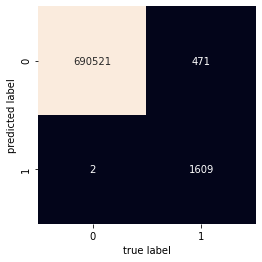

In [40]:
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [41]:
for measure in resultsMLP:
    print(measure,": \n",resultsMLP[measure])

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    690523
           1       1.00      0.77      0.87      2080

    accuracy                           1.00    692603
   macro avg       1.00      0.89      0.94    692603
weighted avg       1.00      1.00      1.00    692603

Area Under Curve : 
 0.8867773979761606


In [42]:
acc = round(MLP.score(X_test, y_test) * 100, 2)
print(f"Acurácia do modelo: {acc}")

Acurácia do modelo: 99.93


Utilizando o modelo acima, percebemos que, apesar de ter dado um ótimo resultado, as redes neurais possuem uma perda com dados desbalanceados. Quando há um dataset desbalanceado, as redes neurais tendem a ficar enviesados pela classe majoritária. No nosso caso, essa classe é a de transações genuínas.

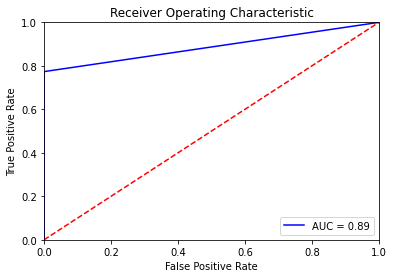

In [57]:
plt.title('Receiver Operating Characteristic')
plt.plot(fprMLP, recallMLP, 'b', label = 'AUC = %0.2f' % aucMLP)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Random forest

Assim como relatado anteriormente, neste projeto usaremos *Random Forest* para realizar a classificação dos dados. Nosso objetivo final é verificar se uma transação é fraudulenta ou não.

Antes de tudo é necessário entendermos o que é uma *Random Forest*.

Uma *Random Forest* nada mais é do que um algoritmo de aprendizagem supervisionada.

### Aprendizagem supervisionada 
é um conjunto de dados rotulados que sabe-se qual será a saída correta de acordo com os dados de entrada.
Aprendizagem supervisionada é classificada em dois tipos: regressão e classificação. O que estamos usando no projeto é de classificação, ou seja, estamos tentando prever os resultados de uma saída.

Voltando ao *Random Forest*, realizando a traudução literal, percebe-se que é uma floresta aleatória. Essa "floresta" que ele cria é uma combinação (conhecido como  *ensemble*) de árvores de decisão

### Certo, mas o que seria uma árvore de decisão?  


Teoricamente falando, árvore de decisão é um modelo estatístico baseado em um treino supervisionado para classificação e previsão de dados. Resumindo: é um conjunto de treinamento com entradas e saídas. 

Na computação, a árvore é uma estrutura de elementos que armazena algum tipo de informação, estes são chamados de **nós**. Porém, toda árvore possui um nó que deu origem a todos os outros nós, a este damos o nome de **nó-raiz**. Os filhos deste nó, são chamados de  **nó-filho**, que por sua vez também pode ter o seu filho. Quando um nó não possui filho, ele é chamado de **nó folha**. Em uma árvore de decisão, uma decisão só é tomada desde que seja feito um caminho entre o nó raiz e o nó folha.


![Exemplo de uma Árvore de Decisão](https://blog.frankfurt-school.de/wp-content/uploads/2018/10/3-460x272.png)

### Random Forest

Agora, imagine várias árvores de decisão juntas. Estas formam a famosa *Random Forest*.
No caso da *Randon Forest*, o algoritmo cria várias árvores de decisões, cada uma com características aleatórias. O resultado de classificação de todas elas é combinado e assim gera-se o resultado esperado (ou não).

Para evitar que o modelo fique enviesado e não apresente o resultado esperado, é preciso ter muito cuidado na Preparação dos Dados. Além disso, é de extrema imporância entender todas as *features* da *Random Forest* e qual o seu real valor.

Uma outra qualidade do modelo, e que o *scikit learn* oferece, é que podemos realizar uma análise de todas as *features* que estamos usando e medi a importância delas. Tudo já implementado. O cálculo é feito para cada característica logo após o treinamento,e também ele normaliza os resultados. Através dessa insepção, conseguimos ter uma noção de qual característica usar e qual não usar.

In [43]:
start_time = time.clock()
randomForest = RandomForestClassifier(n_estimators=15,oob_score=True, class_weight="balanced", n_jobs=-1, random_state=RandomState)
randomForest.fit(X_train, y_train)
rfPred = randomForest.predict(X_test)

# avaliando o modelo
CM_RF = confusion_matrix(y_test, rfPred)
CR_RF = classification_report(y_test,rfPred)
fprRF, recallRF, thresholdsRF = roc_curve(y_test, rfPred)
AUC_RF = auc(fprRF, recallRF)

resultsRF = {"Confusion Matrix":CM_RF,"Classification Report":CR_RF,"Area Under Curve":AUC_RF}
print('Runtime: '+'%s seconds'% (time.clock() - start_time))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Runtime: 87.12707599999999 seconds


Text(91.68, 0.5, 'predicted label')

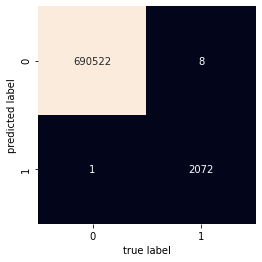

In [44]:
sns.heatmap(CM_RF.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [45]:
for measure in resultsRF:
    print(measure,": \n",resultsRF[measure])

Confusion Matrix : 
 [[690522      1]
 [     8   2072]]
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    690523
           1       1.00      1.00      1.00      2080

    accuracy                           1.00    692603
   macro avg       1.00      1.00      1.00    692603
weighted avg       1.00      1.00      1.00    692603

Area Under Curve : 
 0.9980761989880802


In [46]:
acc = round(randomForest.score(X_test, y_test) * 100, 2)
print(f"Acurácia do modelo: {acc}")

Acurácia do modelo: 100.0


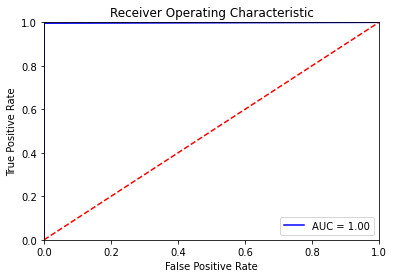

In [50]:
plt.title('Receiver Operating Characteristic')
plt.plot(fprRF, recallRF, 'b', label = 'AUC = %0.2f' % AUC_RF)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()